## **5.1 Precarga de datos Keras**

In [0]:
#verificar la version de tensorflow a manejar (2.x)
%tensorflow_version 2.x

In [54]:
import tensorflow as tf
#print("GPU disponible:", tf.test.is_gpu_available())
print("GPU disponible:", tf.config.list_physical_devices('GPU')) # cambiar entorno de ejecucion con GPU

print("Version TensorFlow:",tf.__version__)

from tensorflow import keras
print("Version Keras:",tf.keras.__version__)

GPU disponible: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Version TensorFlow: 2.2.0-rc3
Version Keras: 2.3.0-tf


In [0]:
#cargar base de datos
mnist = tf.keras.datasets.mnist
#asignar los datos a variables de entrenamiento y prueba
(x_train, y_train), (x_test, y_test) = mnist.load_data()

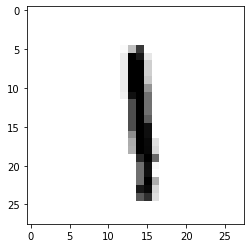

In [56]:
#ver la imagen 8 para verificacion, numero 1
import matplotlib.pyplot as plt
plt.imshow(x_train[8], cmap = plt.cm.binary)

In [57]:
#etiqueta 8
print(y_train[8])

1


In [58]:
#numero de ejes
print(x_train.ndim)

3


In [59]:
#dimensiones del tensor 
print(x_train.shape)

(60000, 28, 28)


In [60]:
#tipos de datos que contiene
print(x_train.dtype)

uint8


## **5.2 Preprocesado de datos de entrada de la RN**

In [0]:
#NORMALIZACION
#tipo float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#se escalan los valores entr 0 y 1
x_train /= 255
x_test /= 255

In [62]:
#Tranformar el tensor de imagen (2d) a array 1d 
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000, 784)

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [63]:
#codificacion one-hot
from tensorflow.keras.utils import to_categorical
#antes
print("Antes")
print(y_test[0])
print(y_train[0])
print(y_train.shape)
print(x_test.shape)
#despues
print("despues")
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
print(y_test[0])
print(y_train[0])
print(y_train.shape)
print(x_test.shape)


Antes
7
5
(60000,)
(10000, 784)
despues
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
(60000, 10)
(10000, 784)


## **5.3 Definicion del modelo**

In [0]:
#antes de tensorflow 2.0
#model = Sequential()
#model.add(Dense(10, activation = 'sigmoid', input_shape=(784,)))
#model.add(Dense(10, activation='softmax'))

#con tensorflow 2.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(10, activation='sigmoid',input_shape=(784,)),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [65]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


## **5.4 configuracion del proceso de aprendizaje**

In [0]:
model.compile(
    loss="categorical_crossentropy", #funcion de costo
    optimizer = "sgd", #stocastic gradient descent
    metrics = ['accuracy'] 
)

## **5.5 Entrenamiento del modelo**

In [67]:
model.fit(x_train, y_train, epochs=5, verbose=1)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.8172 - accuracy: 0.5089
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2342 - accuracy: 0.7353
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9250 - accuracy: 0.8185
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7491 - accuracy: 0.8456
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6416 - accuracy: 0.8608


## **5.6 Evaluacion del modelo**

In [68]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.5885 - accuracy: 0.8712
Test accuracy: 0.8712000250816345


##**5.7 Generacion de predicciones**##

TypeError: ignored

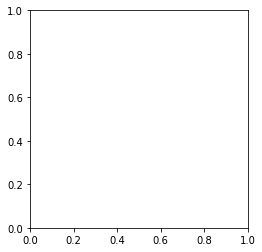

In [71]:
plt.imshow(x_test[11], cmap=plt.cm.binary) #imagen a predecir, el numero 6 en la posicion 11 de x_test
#tratando de arreglar este error, quien sepa la mejora, se los agradezco

In [70]:
import numpy as np

predictions = model.predict(x_test)
print(predictions) #probabilidad de cada elemento
print(np.argmax(predictions[11])) #mayor probabilidad
print(np.sum(predictions[11])) # todas debe sumar 1

[[4.9745124e-03 3.7878719e-03 1.5669209e-03 ... 8.8762766e-01
  3.0996513e-03 7.6892786e-02]
 [9.2282116e-02 1.4172638e-02 3.1948769e-01 ... 1.8609470e-03
  3.1493969e-02 2.3931474e-03]
 [1.2723020e-03 8.2908988e-01 3.8527369e-02 ... 1.0549760e-02
  4.8696492e-02 7.0898873e-03]
 ...
 [4.2787075e-04 6.3645132e-03 4.8086578e-03 ... 1.8608527e-02
  1.1410144e-01 1.4315763e-01]
 [2.3862263e-02 2.0971928e-02 1.1615278e-02 ... 7.2709615e-03
  6.1868960e-01 1.1891313e-02]
 [1.3449537e-02 1.1264462e-03 1.5463781e-01 ... 8.4464281e-04
  7.7191736e-03 3.8792777e-03]]
6
1.0
